In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
application = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
credit = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')

In [5]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
credit.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


In [7]:
print (application.describe())

                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000

In [8]:
print (credit.describe())

                 ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00


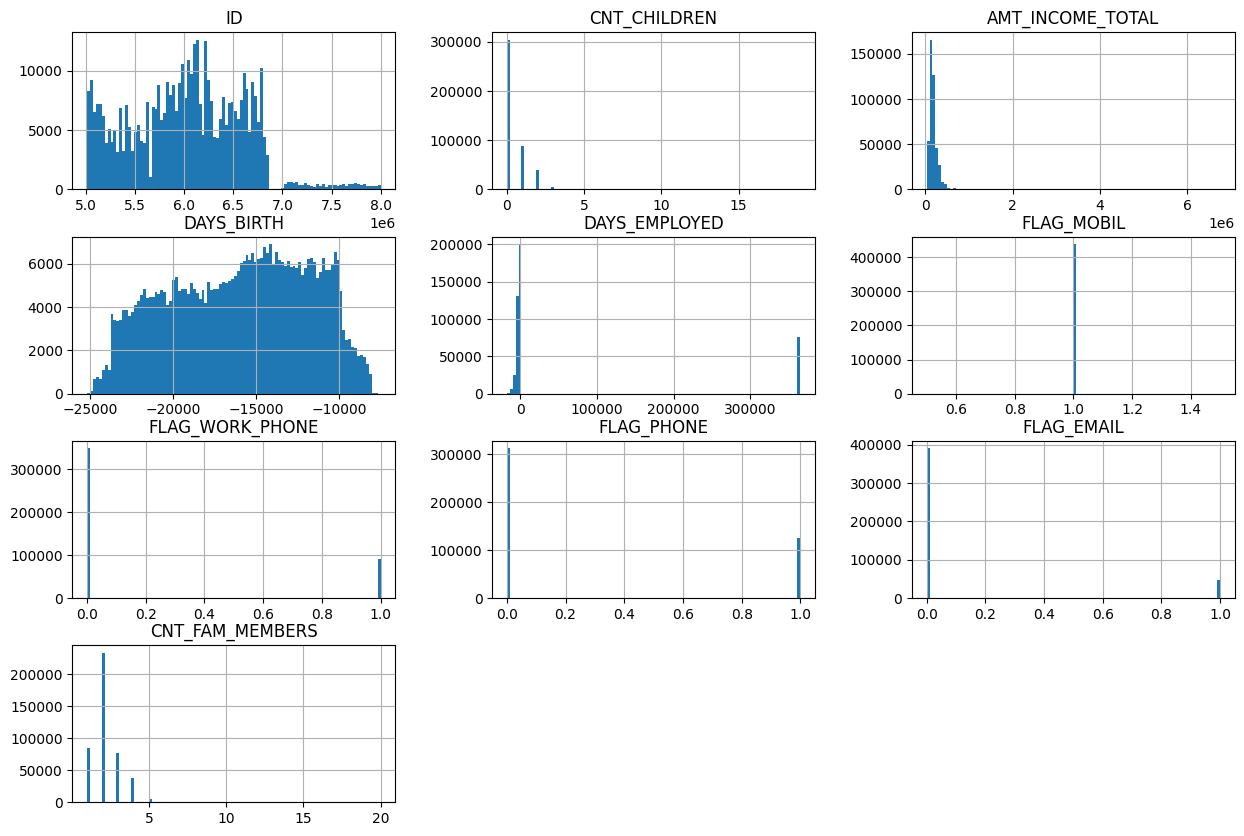

In [9]:
application.hist(bins=100,figsize=(15,10))
plt.show()

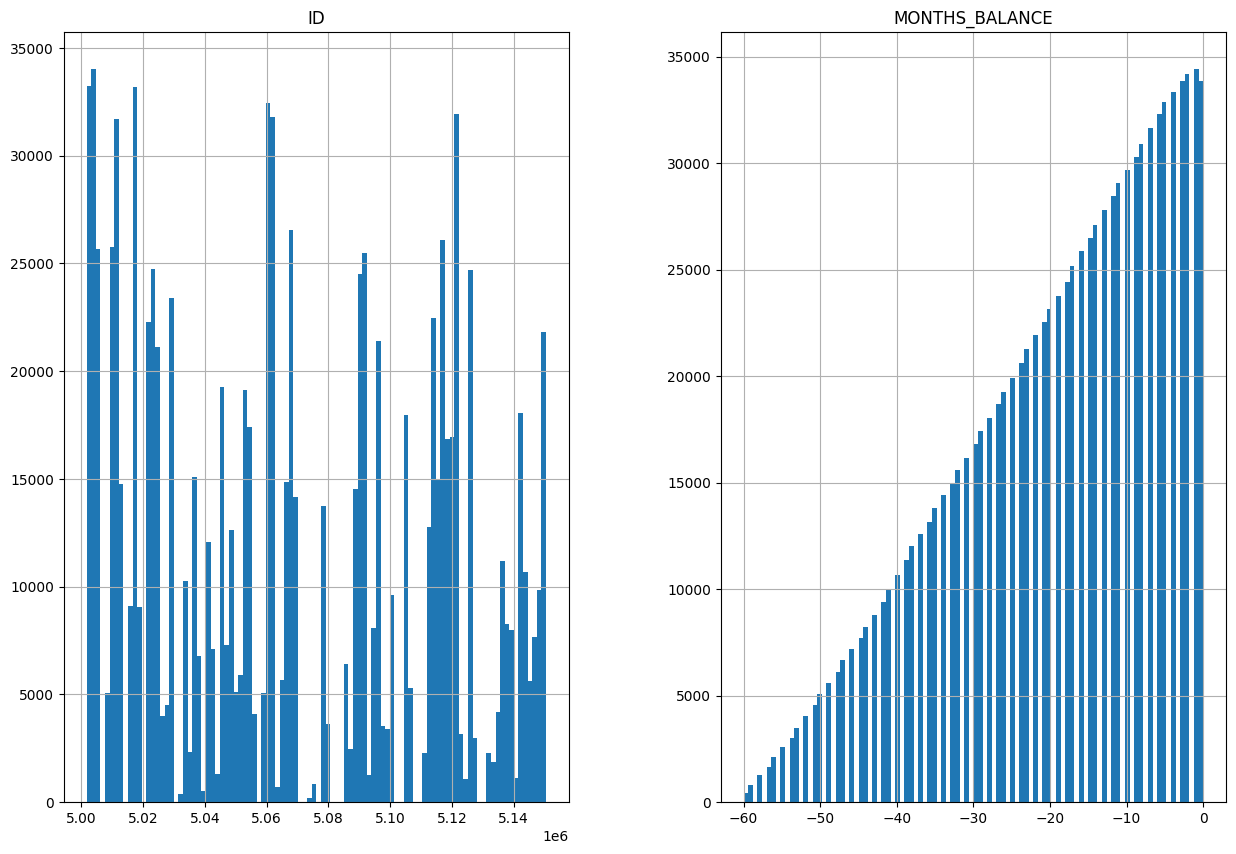

In [10]:
credit.hist(bins=100,figsize=(15,10))
plt.show()

In [11]:
credit['STATUS'].value_counts()["1"]

11090

In [12]:
len(application)

438557

In [13]:
len(credit)

1048575

In [14]:
application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [15]:
credit.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [16]:
credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [17]:
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

# EDA & DATA PREPROCESSING

In [18]:
application=application.drop("OCCUPATION_TYPE",axis=1)
application.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
dtype: int64

In [19]:
df_str=application[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',"NAME_INCOME_TYPE",'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]

In [20]:
from sklearn import preprocessing
df1 = df_str.apply(preprocessing.LabelEncoder().fit_transform)

In [21]:
df1.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,1,1,1,4,1,0,4
1,1,1,1,4,1,0,4
2,1,1,1,4,4,1,1
3,0,0,1,0,4,3,1
4,0,0,1,0,4,3,1
5,0,0,1,0,4,3,1
6,0,0,1,0,4,3,1
7,0,0,1,1,1,2,1
8,0,0,1,1,1,2,1
9,0,0,1,1,1,2,1


In [22]:
df_ot =application[["ID","CNT_CHILDREN","AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL","CNT_FAM_MEMBERS"]]
df_ot.head(10)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,0,1,1,1.0
5,5008810,0,270000.0,-19110,-3051,0,1,1,1.0
6,5008811,0,270000.0,-19110,-3051,0,1,1,1.0
7,5008812,0,283500.0,-22464,365243,0,0,0,1.0
8,5008813,0,283500.0,-22464,365243,0,0,0,1.0
9,5008814,0,283500.0,-22464,365243,0,0,0,1.0


In [23]:
df_ot.dtypes

ID                    int64
CNT_CHILDREN          int64
AMT_INCOME_TOTAL    float64
DAYS_BIRTH            int64
DAYS_EMPLOYED         int64
FLAG_WORK_PHONE       int64
FLAG_PHONE            int64
FLAG_EMAIL            int64
CNT_FAM_MEMBERS     float64
dtype: object

In [24]:
df_ot.loc[:, 'AMT_INCOME_TOTAL'] = df_ot['AMT_INCOME_TOTAL'].astype(np.int64)
df_ot.loc[:, 'CNT_FAM_MEMBERS'] = df_ot['CNT_FAM_MEMBERS'].astype(np.int64)

In [25]:
df_ot.dtypes

ID                    int64
CNT_CHILDREN          int64
AMT_INCOME_TOTAL    float64
DAYS_BIRTH            int64
DAYS_EMPLOYED         int64
FLAG_WORK_PHONE       int64
FLAG_PHONE            int64
FLAG_EMAIL            int64
CNT_FAM_MEMBERS     float64
dtype: object

In [26]:
df1.dtypes

CODE_GENDER            int64
FLAG_OWN_CAR           int64
FLAG_OWN_REALTY        int64
NAME_INCOME_TYPE       int64
NAME_EDUCATION_TYPE    int64
NAME_FAMILY_STATUS     int64
NAME_HOUSING_TYPE      int64
dtype: object

In [27]:
df=pd.concat([df_ot,df1],axis=1)

In [28]:
df.head(10)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4
1,5008805,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4
2,5008806,0,112500.0,-21474,-1134,0,0,0,2.0,1,1,1,4,4,1,1
3,5008808,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,1,0,4,3,1
4,5008809,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,1,0,4,3,1
5,5008810,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,1,0,4,3,1
6,5008811,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,1,0,4,3,1
7,5008812,0,283500.0,-22464,365243,0,0,0,1.0,0,0,1,1,1,2,1
8,5008813,0,283500.0,-22464,365243,0,0,0,1.0,0,0,1,1,1,2,1
9,5008814,0,283500.0,-22464,365243,0,0,0,1.0,0,0,1,1,1,2,1


In [29]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [30]:
credit=credit.replace({'STATUS': "X"},  "1")
credit=credit.replace({'STATUS': "C"},  "1")
credit=credit.replace({'STATUS': "0"},  "1")
credit=credit.replace({'STATUS': "1"},  "1")
credit=credit.replace({'STATUS': "2"},  "0")
credit=credit.replace({'STATUS': "3"},  "0")
credit=credit.replace({'STATUS': "4"},  "0")
credit=credit.replace({'STATUS': "5"},  "0")
df2=credit

In [31]:
df2.tail(20)

,ID,MONTHS_BALANCE,STATUS
1048555,5150487,-10,1
1048556,5150487,-11,1
1048557,5150487,-12,1
1048558,5150487,-13,1
1048559,5150487,-14,1
1048560,5150487,-15,1
1048561,5150487,-16,1
1048562,5150487,-17,1
1048563,5150487,-18,1
1048564,5150487,-19,1


In [32]:
df2['STATUS'] = df2['STATUS'].astype(np.int64)

In [33]:
df2.describe()

,ID,MONTHS_BALANCE,STATUS
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01,9.970398e-01
std,4.615058e+04,1.402350e+01,5.432723e-02
min,5.001711e+06,-6.000000e+01,0.000000e+00
25%,5.023644e+06,-2.900000e+01,1.000000e+00
50%,5.062104e+06,-1.700000e+01,1.000000e+00
75%,5.113856e+06,-7.000000e+00,1.000000e+00
max,5.150487e+06,0.000000e+00,1.000000e+00


In [34]:
df2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,1
...,...,...,...
1048570,5150487,-25,1
1048571,5150487,-26,1
1048572,5150487,-27,1
1048573,5150487,-28,1


In [35]:
df2=df2.drop("MONTHS_BALANCE",axis=1)

df2

,ID,STATUS
0,5001711,1
1,5001711,1
2,5001711,1
3,5001711,1
4,5001712,1
...,...,...
1048570,5150487,1
1048571,5150487,1
1048572,5150487,1
1048573,5150487,1


In [36]:
df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4
1,5008805,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4
2,5008806,0,112500.0,-21474,-1134,0,0,0,2.0,1,1,1,4,4,1,1
3,5008808,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,1,0,4,3,1
4,5008809,0,270000.0,-19110,-3051,0,1,1,1.0,0,0,1,0,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,135000.0,-22717,365243,0,0,0,1.0,1,0,1,1,4,2,1
438553,6840222,0,103500.0,-15939,-3007,0,0,0,1.0,0,0,0,4,4,3,1
438554,6841878,0,54000.0,-8169,-372,1,0,0,1.0,0,0,0,0,1,3,5
438555,6842765,0,72000.0,-21673,365243,0,0,0,2.0,0,0,1,1,4,1,1


In [37]:
df_merged= df.merge(df2, how='inner', on=['ID'])

In [38]:
df_merged

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,STATUS
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4,1
1,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4,1
2,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4,1
3,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4,1
4,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,1,0,1,4,4,3,4,1
777711,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,1,0,1,4,4,3,4,0
777712,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,1,0,1,4,4,3,4,1
777713,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,1,0,1,4,4,3,4,1


In [39]:
df_merged["AGE"] = round(df_merged["DAYS_BIRTH"] / -abs(365))
df_merged["YEARS_EMPLOYED"] = round(df_merged["DAYS_EMPLOYED"] / -abs(365))

In [40]:
df_merged['AGE'] = df_merged['AGE'].astype(np.int64)
df_merged['YEARS_EMPLOYED'] = df_merged['YEARS_EMPLOYED'].astype(np.int64)

In [41]:
df_merged

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,STATUS,AGE,YEARS_EMPLOYED
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4,1,33,12
1,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4,1,33,12
2,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4,1,33,12
3,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4,1,33,12
4,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,1,1,1,4,1,0,4,1,33,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,1,0,1,4,4,3,4,1,25,3
777711,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,1,0,1,4,4,3,4,0,25,3
777712,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,1,0,1,4,4,3,4,1,25,3
777713,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,1,0,1,4,4,3,4,1,25,3


In [42]:
df_merged=df_merged.drop(["DAYS_EMPLOYED","DAYS_BIRTH"],axis=1)

In [43]:
df_merged

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,STATUS,AGE,YEARS_EMPLOYED
0,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,1,33,12
1,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,1,33,12
2,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,1,33,12
3,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,1,33,12
4,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,1,33,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,1,25,3
777711,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,0,25,3
777712,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,1,25,3
777713,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,1,25,3


In [44]:
df_status=df_merged["STATUS"]
df_status

0         1
1         1
2         1
3         1
4         1
         ..
777710    1
777711    0
777712    1
777713    1
777714    1
Name: STATUS, Length: 777715, dtype: int64

In [45]:
df_merged=df_merged.drop("STATUS",axis=1)
df_merged

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED
0,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12
1,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12
2,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12
3,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12
4,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3
777711,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3
777712,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3
777713,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3


In [46]:
df_merged["STATUS"]=df_status
df_merged

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,STATUS
0,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12,1
1,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12,1
2,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12,1
3,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12,1
4,5008804,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3,1
777711,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3,0
777712,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3,1
777713,5150337,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3,1


In [47]:
df_merged['STATUS'].value_counts(normalize = True)

STATUS
1    0.996364
0    0.003636
Name: proportion, dtype: float64

In [48]:
print(df_merged.columns)

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE',
       'YEARS_EMPLOYED', 'STATUS'],
      dtype='object')


In [49]:
df_merged=df_merged.drop("ID",axis=1)
df_merged

,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,STATUS
0,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12,1
1,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12,1
2,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12,1
3,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12,1
4,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3,1
777711,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3,0
777712,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3,1
777713,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3,1


# Train_test_Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x=df_merged.drop("STATUS",axis=1)
y=df_merged["STATUS"]

In [52]:
x

,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED
0,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12
1,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12
2,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12
3,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12
4,0,427500.0,1,0,0,2.0,1,1,1,4,1,0,4,33,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3
777711,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3
777712,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3
777713,0,112500.0,0,0,0,1.0,1,0,1,4,4,3,4,25,3


In [53]:
y

0         1
1         1
2         1
3         1
4         1
         ..
777710    1
777711    0
777712    1
777713    1
777714    1
Name: STATUS, Length: 777715, dtype: int64

In [54]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score

# Classification_Model

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt = DecisionTreeClassifier(class_weight="balanced",max_depth=500,min_samples_split=22)

In [58]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=500,
                       min_samples_split=22)

In [59]:
y_pred = dt.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)


Accuracy: 0.948353084885241
Precision: 0.9997596698861833
Recall: 0.9483942290320638
F1-score: 0.973399793379308
AUC-ROC: 0.9426870075005742


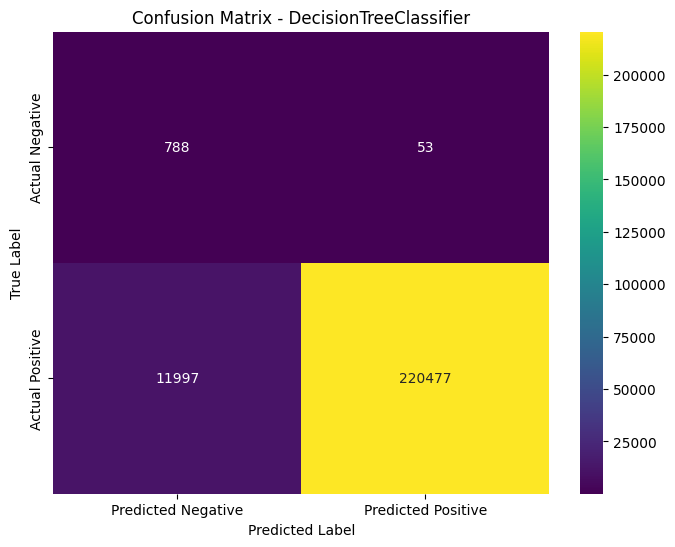

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - DecisionTreeClassifier')
plt.show()


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.06      0.94      0.12       841
           1       1.00      0.95      0.97    232474

    accuracy                           0.95    233315
   macro avg       0.53      0.94      0.54    233315
weighted avg       1.00      0.95      0.97    233315



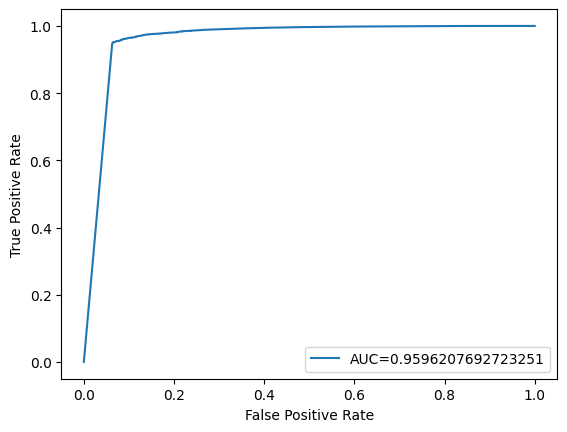

In [63]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [64]:
from imblearn.over_sampling import RandomOverSampler

In [65]:
from collections import Counter

In [66]:
ros= RandomOverSampler()

In [67]:
x_train_ros, y_train_ros= ros.fit_resample(x_train, y_train) 

In [68]:
dt_2 = DecisionTreeClassifier(class_weight="balanced",max_depth=500,min_samples_split=22)

In [69]:
dt_2.fit(x_train_ros, y_train_ros)

DecisionTreeClassifier(class_weight='balanced', max_depth=500,
                       min_samples_split=22)

In [70]:
y_pred_dt = dt_2.predict(x_test)

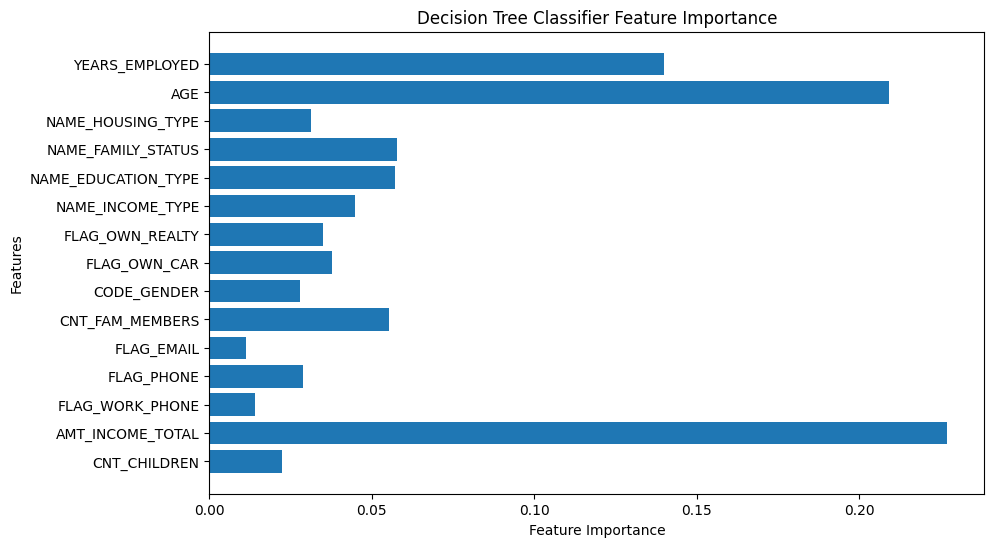

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(dt_2.feature_importances_)), dt_2.feature_importances_, align='center')
plt.yticks(range(len(dt_2.feature_importances_)), x_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Classifier Feature Importance')
plt.show()


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_test and y_pred are your actual and predicted labels respectively
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
auc_roc = roc_auc_score(y_test, y_pred_dt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)


Accuracy: 0.9483659430383816
Precision: 0.9997596731554914
Recall: 0.948407133700973
F1-score: 0.9734065919511177
AUC-ROC: 0.9426934598350287


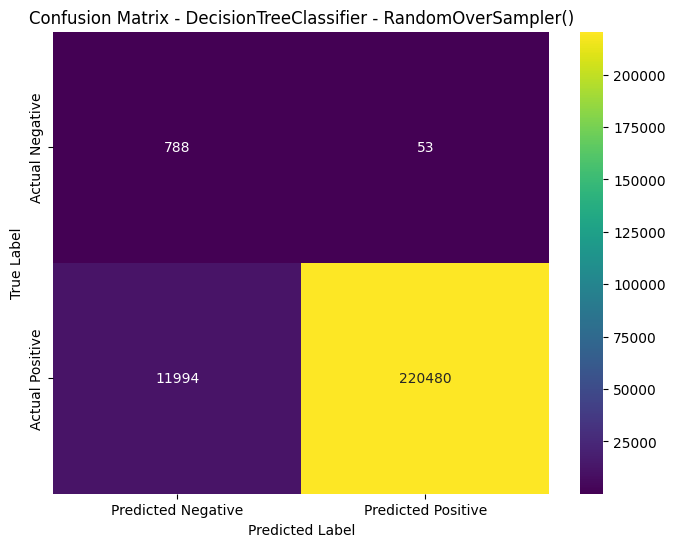

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your actual and predicted labels respectively
cm = confusion_matrix(y_test, y_pred_dt)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - DecisionTreeClassifier - RandomOverSampler()')
plt.show()


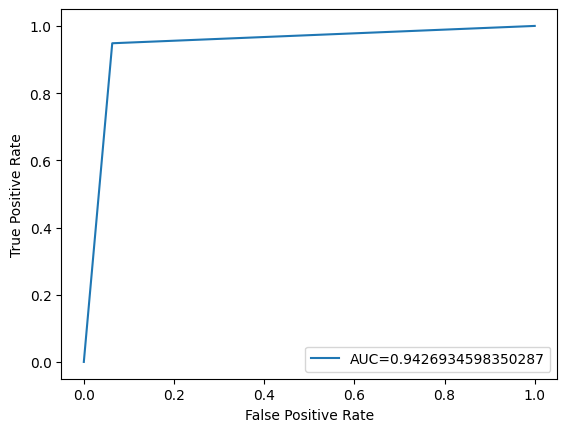

In [74]:
y_pred_proba = dt_2.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_dt)
auc = metrics.roc_auc_score(y_test, y_pred_dt)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [75]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.06      0.94      0.12       841
           1       1.00      0.95      0.97    232474

    accuracy                           0.95    233315
   macro avg       0.53      0.94      0.54    233315
weighted avg       1.00      0.95      0.97    233315



In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
from imblearn.under_sampling import RandomUnderSampler

In [78]:
rus=RandomUnderSampler()

In [79]:
x_train_rus, y_train_rus= rus.fit_resample(x_train, y_train)

In [80]:
rf=RandomForestClassifier()

In [81]:
model_rf=rf.fit(x_train_rus, y_train_rus)

In [82]:
pred_rus_rf=model_rf.predict(x_test)

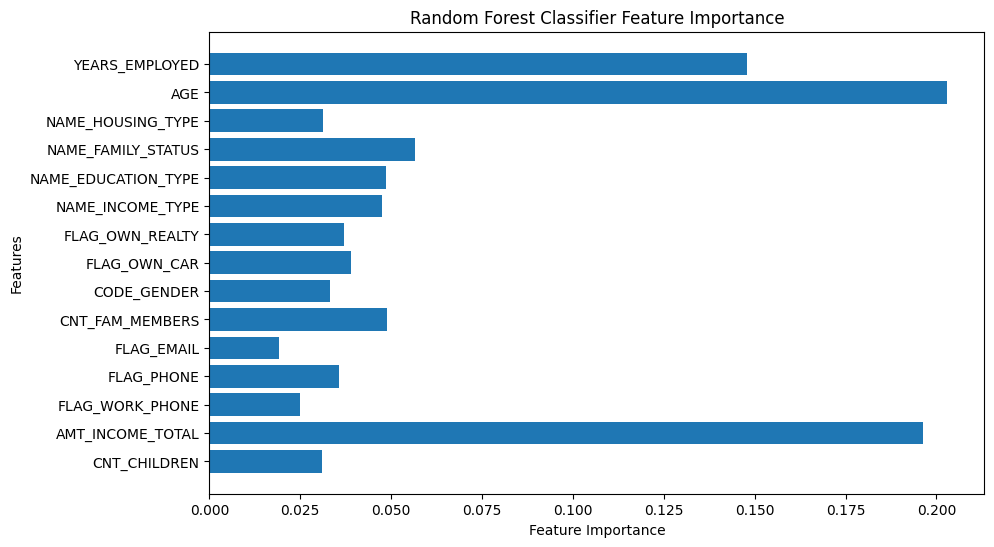

In [83]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.barh(range(len(model_rf.feature_importances_)), model_rf.feature_importances_, align='center')
plt.yticks(range(len(model_rf.feature_importances_)), x_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Feature Importance')
plt.show()


In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


accuracy = accuracy_score(y_test, pred_rus_rf)
precision = precision_score(y_test, pred_rus_rf)
recall = recall_score(y_test, pred_rus_rf)
f1 = f1_score(y_test, pred_rus_rf)
auc_roc = roc_auc_score(y_test, pred_rus_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)


Accuracy: 0.9378736900756488
Precision: 0.9997019838704501
Recall: 0.9379285425466934
F1-score: 0.9678305661775964
AUC-ROC: 0.9303198004053326


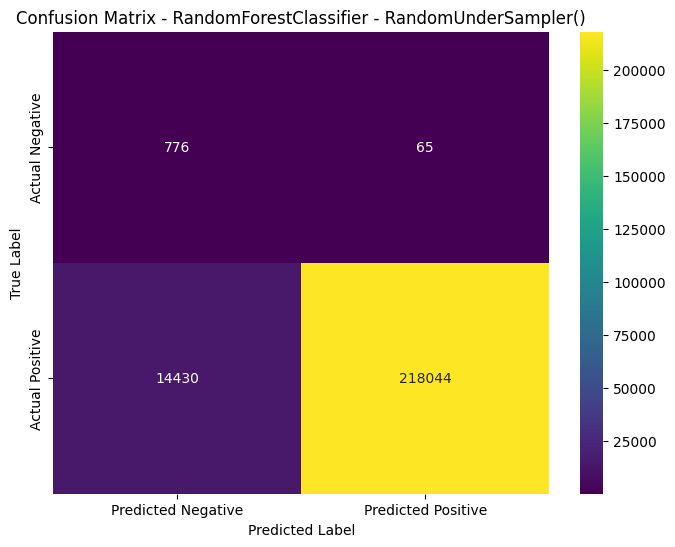

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your actual and predicted labels respectively
cm = confusion_matrix(y_test, pred_rus_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - RandomForestClassifier - RandomUnderSampler()')
plt.show()


In [86]:
print(classification_report(y_test,pred_rus_rf))

              precision    recall  f1-score   support

           0       0.05      0.92      0.10       841
           1       1.00      0.94      0.97    232474

    accuracy                           0.94    233315
   macro avg       0.53      0.93      0.53    233315
weighted avg       1.00      0.94      0.96    233315



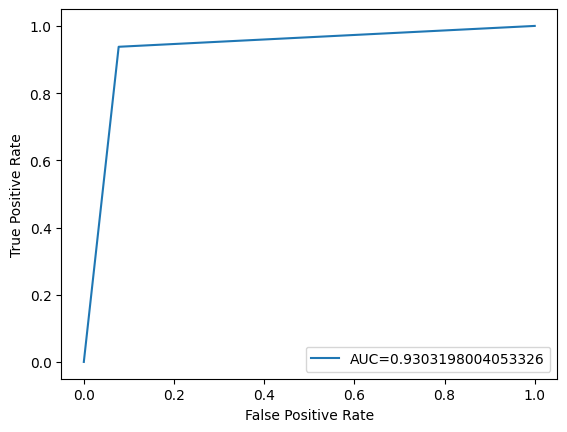

In [87]:
y_pred_proba = model_rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_rus_rf)
auc = metrics.roc_auc_score(y_test, pred_rus_rf)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

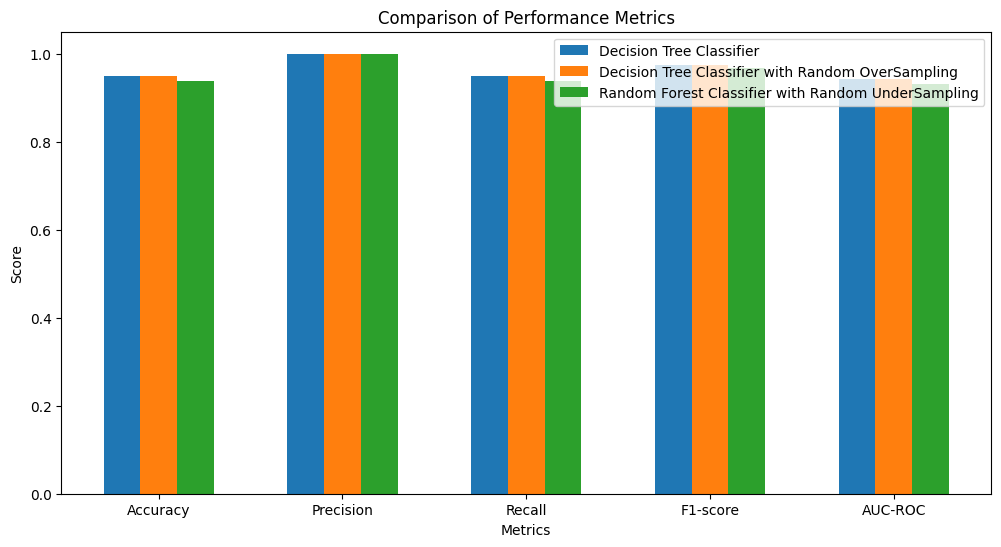

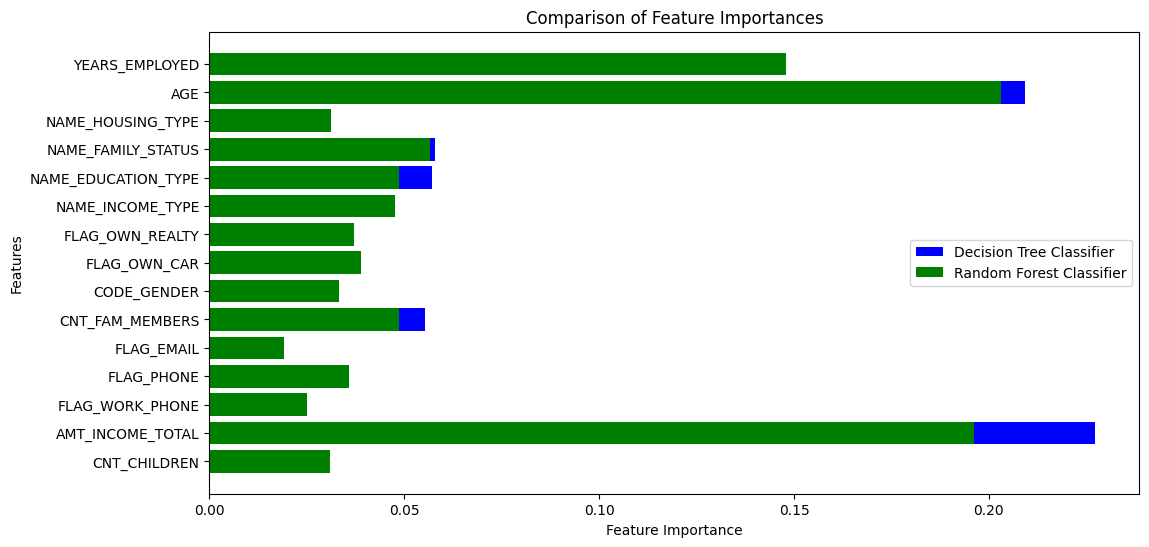

In [92]:
import matplotlib.pyplot as plt

# Comparison of Performance Metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
dt_metrics = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
dt_ros_metrics = [accuracy_score(y_test, y_pred_dt), precision_score(y_test, y_pred_dt), recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt), roc_auc_score(y_test, y_pred_dt)]
rf_rus_metrics = [accuracy_score(y_test, pred_rus_rf), precision_score(y_test, pred_rus_rf), recall_score(y_test, pred_rus_rf), f1_score(y_test, pred_rus_rf), roc_auc_score(y_test, pred_rus_rf)]

bar_width = 0.2
index = range(len(metrics_names))

plt.figure(figsize=(12, 6))
plt.bar(index, dt_metrics, width=bar_width, label='Decision Tree Classifier')
plt.bar([i + bar_width for i in index], dt_ros_metrics, width=bar_width, label='Decision Tree Classifier with Random OverSampling')
plt.bar([i + 2 * bar_width for i in index], rf_rus_metrics, width=bar_width, label='Random Forest Classifier with Random UnderSampling')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Performance Metrics')
plt.xticks([i + bar_width for i in index], metrics_names)
plt.legend()
plt.show()

# Comparison of Feature Importances
dt_feature_importance = dt_2.feature_importances_
rf_feature_importance = model_rf.feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(range(len(dt_feature_importance)), dt_feature_importance, color='blue', label='Decision Tree Classifier')
plt.barh(range(len(rf_feature_importance)), rf_feature_importance, color='green', label='Random Forest Classifier')
plt.yticks(range(len(dt_2.feature_importances_)), x_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Comparison of Feature Importances')
plt.legend()
plt.show()
